In [9]:
!pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image
import tensorflow_hub as hub


In [11]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
!pip install tensorflow_hub

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


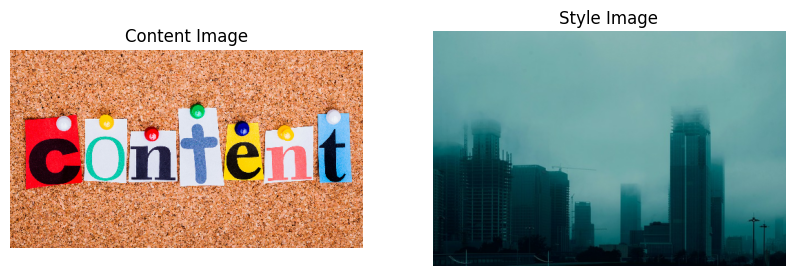

In [13]:
def load_image(path_to_img):
    max_dim = 512
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)
    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img
    
content_image = load_image("content.jpg")
style_image = load_image("style.jpg")  





def imshow(image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)
    plt.imshow(image)
    if title:
        plt.title(title)
    plt.axis('off')

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
imshow(content_image, "Content Image")

plt.subplot(1, 2, 2)
imshow(style_image, "Style Image")


In [14]:
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')


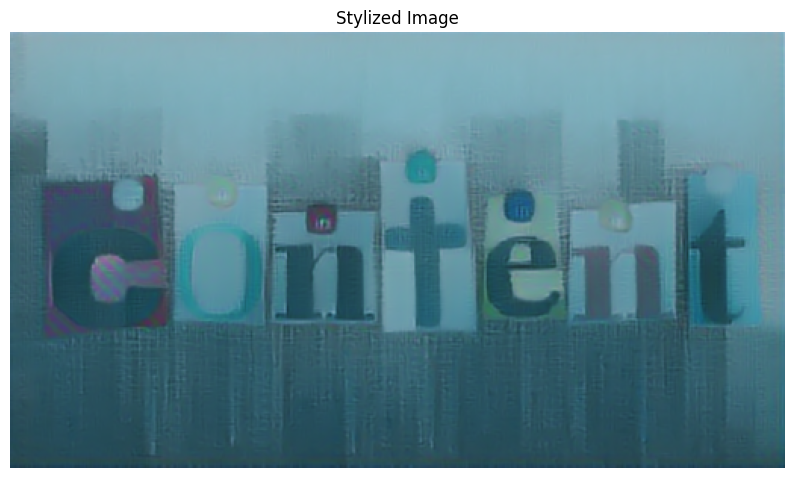

In [15]:
stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0]

plt.figure(figsize=(10, 10))
imshow(stylized_image, "Stylized Image")


In [16]:
tensor_to_image = tf.image.convert_image_dtype(stylized_image, dtype=tf.uint8)
image = PIL.Image.fromarray(tensor_to_image.numpy()[0])
image.save('stylized_output.jpg')


# Task 5: Neural Style Transfer  
**Internship:** Prodigy Infotech  
**Name:** Abhishek Kumar  

This project applies the artistic style of one image to the content of another using TensorFlow Hub's style transfer model.  
The final stylized image is generated and saved as `stylized_output.jpg`.
